# Credit Risk Modelling and Web Scraping of Stocks Prices

## Data Exploring & Cleansing

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
cr_loan=pd.read_csv('cr_loan_raw.csv')
#loading raw data, need process the data before modelling

In [3]:
cr_loan.head(10)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
5,21,9900,OWN,2.0,VENTURE,A,2500,7.14,1,0.25,N,2
6,26,77100,RENT,8.0,EDUCATION,B,35000,12.42,1,0.45,N,3
7,24,78956,RENT,5.0,MEDICAL,B,35000,11.11,1,0.44,N,4
8,24,83000,RENT,8.0,PERSONAL,A,35000,8.90,1,0.42,N,2
9,21,10000,OWN,6.0,VENTURE,D,1600,14.74,1,0.16,N,3


In [4]:
#if the column contains categorical data, i usually check what it contains 
cr_loan['person_home_ownership'].value_counts()

RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: person_home_ownership, dtype: int64

In [5]:
cr_loan['loan_intent'].value_counts()

EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: loan_intent, dtype: int64

In [6]:
cr_loan['loan_grade'].value_counts()

A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: loan_grade, dtype: int64

In [7]:
#check the features of data
cr_loan.dtypes

person_age                      int64
person_income                   int64
person_home_ownership          object
person_emp_length             float64
loan_intent                    object
loan_grade                     object
loan_amnt                       int64
loan_int_rate                 float64
loan_status                     int64
loan_percent_income           float64
cb_person_default_on_file      object
cb_person_cred_hist_length      int64
dtype: object

In [8]:
#check numbers of features a record contains
len(cr_loan.dtypes)

12

In [9]:
#check the size of the whole data set
cr_loan.shape

(32581, 12)

## Data Visualization 
#### to look at relationships between data as well as find outliers, if any

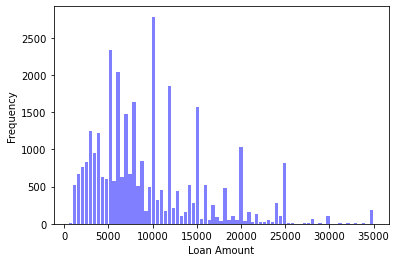

In [10]:
# Look at the distribution of loan amounts with a histogram

n, bins, patches = plt.hist(x=cr_loan['loan_amnt'], bins='auto', color='blue',alpha=0.5, rwidth=0.85)
plt.xlabel("Loan Amount")
plt.ylabel('Frequency')
plt.show()

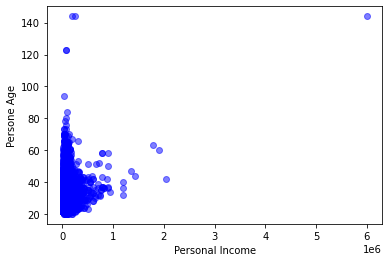

In [11]:
# Plot a scatter plot of income against age
plt.scatter(cr_loan['person_income'], cr_loan['person_age'],c='blue', alpha=0.5)
plt.xlabel('Personal Income')
plt.ylabel('Persone Age')
plt.show()

#age larger than 100 will be removed in 'removing outliers' session

In [12]:
# Create a cross table of the loan intent and loan status
print(pd.crosstab(cr_loan['loan_intent'], cr_loan['loan_status']).apply(lambda r: r/r.sum(), axis=1))

#loan claimed for education, personal, and venture purpose have relatively low default rate

loan_status               0         1
loan_intent                          
DEBTCONSOLIDATION  0.714121  0.285879
EDUCATION          0.827832  0.172168
HOMEIMPROVEMENT    0.738974  0.261026
MEDICAL            0.732993  0.267007
PERSONAL           0.801123  0.198877
VENTURE            0.851897  0.148103


In [13]:
#Create a cross table of home ownership grouped by loan_status and loan_grade.
pd.crosstab(cr_loan['person_home_ownership'],[cr_loan['loan_status'],cr_loan['loan_grade']],margins=True)
#loan for people who are renting department have high default rate, regarding on their loan grade

loan_status               0                                   1              \
loan_grade                A     B     C     D    E   F  G     A     B     C   
person_home_ownership                                                         
MORTGAGE               5219  3729  1934   658  178  36  0   239   324   321   
OTHER                    23    29    11     9    2   0  0     3     5     6   
OWN                     860   770   464   264   26   7  0    66    34    31   
RENT                   3602  4222  2710   554  137  28  1   765  1338   981   
All                    9704  8750  5119  1485  343  71  1  1073  1701  1339   

loan_status                                  All  
loan_grade                D    E    F   G         
person_home_ownership                             
MORTGAGE                553  161   61  31  13444  
OTHER                    11    6    2   0    107  
OWN                      18   31    8   5   2584  
RENT                   1559  423   99  27  16446  
All                    2141  621  170  63  32581

In [14]:
#mean interest rate group by loan_status and person_home_ownership
pd.crosstab(cr_loan['person_home_ownership'], cr_loan['loan_status'], values=cr_loan['loan_int_rate'], aggfunc='mean').round(2)

loan_status,0,1
person_home_ownership,,
MORTGAGE,10.06,13.43
OTHER,11.41,13.56
OWN,10.75,12.24
RENT,10.75,12.97


In [15]:
# Create a cross table of home ownership, loan status, and average percent income
pd.crosstab(cr_loan['person_home_ownership'], cr_loan['loan_status'],
              values=cr_loan['loan_percent_income'], aggfunc='mean')

loan_status,0,1
person_home_ownership,,
MORTGAGE,0.146504,0.184882
OTHER,0.143784,0.300000
OWN,0.180013,0.297358
RENT,0.144611,0.264859


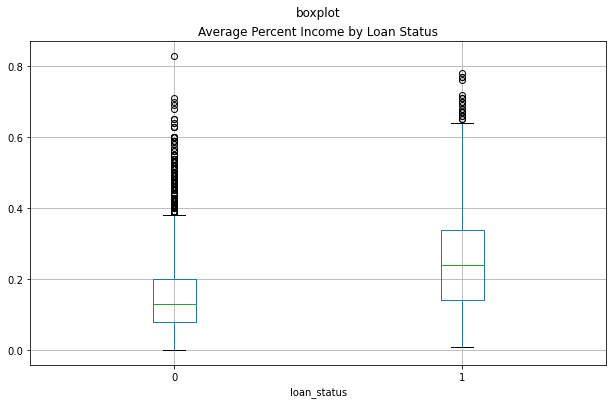

In [16]:
# Create a box plot of percentage income by loan status
cr_loan.boxplot(column = ['loan_percent_income'], by = 'loan_status',figsize=(10,6)) #vert=False
plt.title('Average Percent Income by Loan Status')
plt.suptitle('boxplot')
plt.show()

In [17]:
cr_loan.corr()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.173202,0.163106,0.050787,0.012580,-0.021629,-0.042411,0.859133
person_income,0.173202,1.000000,0.134268,0.266820,0.000792,-0.144449,-0.254471,0.117987
person_emp_length,0.163106,0.134268,1.000000,0.113082,-0.056405,-0.082489,-0.054111,0.144699
loan_amnt,0.050787,0.266820,0.113082,1.000000,0.146813,0.105376,0.572612,0.041967
loan_int_rate,0.012580,0.000792,-0.056405,0.146813,1.000000,0.335133,0.120314,0.016696
loan_status,-0.021629,-0.144449,-0.082489,0.105376,0.335133,1.000000,0.379366,-0.015529
loan_percent_income,-0.042411,-0.254471,-0.054111,0.572612,0.120314,0.379366,1.000000,-0.031690
cb_person_cred_hist_length,0.859133,0.117987,0.144699,0.041967,0.016696,-0.015529,-0.031690,1.000000


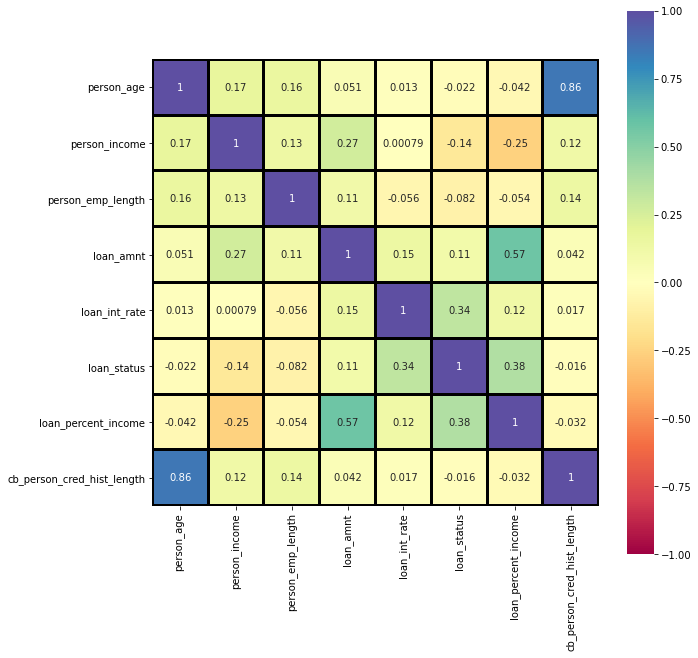

In [18]:
fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(cr_loan.corr(),annot=True,fmt='.2g',vmin=-1,vmax=1,center=0,
            cmap='Spectral',linewidth=2,linecolor='black',square=True,ax=ax)

plt.show()

In [19]:
#check the statistics of loan amount
print(cr_loan['loan_amnt'].describe())

count    32581.000000
mean      9589.371106
std       6322.086646
min        500.000000
25%       5000.000000
50%       8000.000000
75%      12200.000000
max      35000.000000
Name: loan_amnt, dtype: float64


## Removing Outliers

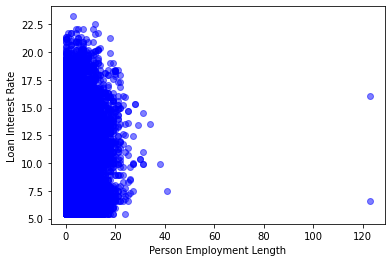

In [20]:
# Plot a scatter plot of income against age
plt.scatter(cr_loan['person_emp_length'], cr_loan['loan_int_rate'],c='blue', alpha=0.5)
plt.xlabel('Person Employment Length')
plt.ylabel('Loan Interest Rate')
plt.show()

In [21]:
#employment length more than 120 years is not quite possible
cr_loan[cr_loan['person_emp_length'] >= 60]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,0.10,N,4


In [22]:
cr_loan[cr_loan['person_emp_length'] >= 60].index

Int64Index([0, 210], dtype='int64')

In [23]:
indices = cr_loan[cr_loan['person_emp_length'] >= 60].index;
cr_loan.drop(indices, inplace=True)

#cr_loan_new = cr_loan.drop(indices)

In [24]:
cr_loan.shape

(32579, 12)

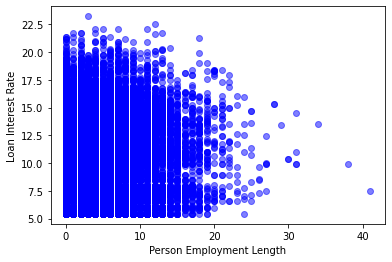

In [25]:
# Plot again to see the difference
plt.scatter(cr_loan['person_emp_length'], cr_loan['loan_int_rate'],c='blue', alpha=0.5)
plt.xlabel('Person Employment Length')
plt.ylabel('Loan Interest Rate')
plt.show()

In [26]:
# Create the cross table for loan status, home ownership, and the max employment length
pd.crosstab(cr_loan['loan_status'],cr_loan['person_home_ownership'],
        values=cr_loan['person_emp_length'], aggfunc='max')
#longer employment length lowers the default rate

person_home_ownership,MORTGAGE,OTHER,OWN,RENT
loan_status,,,,
0,38.0,24.0,31.0,41.0
1,34.0,11.0,17.0,27.0


In [27]:
# Create the cross table from earlier and include minimum employment length
pd.crosstab(cr_loan['loan_status'],cr_loan['person_home_ownership'],
        values=cr_loan['person_emp_length'], aggfunc=['mean','max'])

mean                                    max        \
person_home_ownership  MORTGAGE     OTHER       OWN      RENT MORTGAGE OTHER   
loan_status                                                                    
0                      5.891904  3.945946  5.316986  3.939440     38.0  24.0   
1                      5.755828  3.090909  3.161677  3.625225     34.0  11.0   

                                   
person_home_ownership   OWN  RENT  
loan_status                        
0                      31.0  41.0  
1                      17.0  27.0

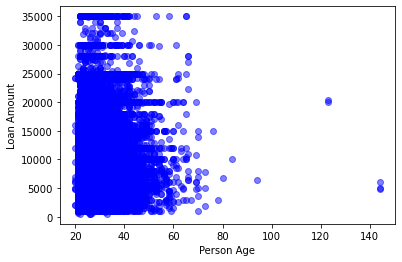

In [28]:
# Create the scatter plot for age and amount
plt.scatter(cr_loan['person_age'], cr_loan['loan_amnt'], c='blue', alpha=0.5)
plt.xlabel("Person Age")
plt.ylabel("Loan Amount")
plt.show()

In [29]:
# Use Pandas to drop the record from the data frame and create a new one
cr_loan.drop(cr_loan[cr_loan['person_age'] > 100].index,inplace=True)

In [30]:
cr_loan.shape

(32574, 12)

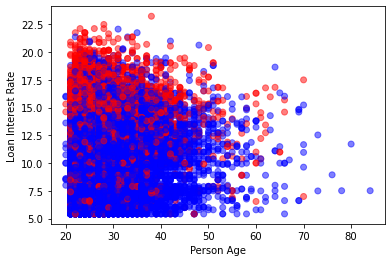

In [31]:
import matplotlib
# Create a scatter plot of age and interest rate
colors = ["blue","red"]
plt.scatter(cr_loan['person_age'],
            cr_loan['loan_int_rate'],
            c = cr_loan['loan_status'],
            cmap = matplotlib.colors.ListedColormap(colors),
            alpha=0.5,
           )
plt.xlabel("Person Age")
plt.ylabel("Loan Interest Rate")
plt.show()


## Handling with Missing Data

In [32]:
cr_loan.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [33]:
# Print a null value column array
null_columns=cr_loan.columns[cr_loan.isnull().any()]

In [34]:
null_columns
#check which conlumns contain null value

Index(['person_emp_length', 'loan_int_rate'], dtype='object')

In [35]:
cr_loan[null_columns].isnull().sum()

person_emp_length     895
loan_int_rate        3115
dtype: int64

In [36]:
# Print the top five rows with nulls for employment length
cr_loan[cr_loan['person_emp_length'].isnull()].head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
105,22,12600,MORTGAGE,NaN,PERSONAL,A,2000,5.42,1,0.16,N,4
222,24,185000,MORTGAGE,NaN,EDUCATION,B,35000,12.42,0,0.19,N,2
379,24,16800,MORTGAGE,NaN,DEBTCONSOLIDATION,A,3900,NaN,1,0.23,N,3
407,25,52000,RENT,NaN,PERSONAL,B,24000,10.74,1,0.46,N,2
408,22,17352,MORTGAGE,NaN,EDUCATION,C,2250,15.27,0,0.13,Y,3


In [37]:
# Impute the null values with the median value for all employment lengths
cr_loan['person_emp_length'].fillna((cr_loan['person_emp_length'].median()), inplace=True)

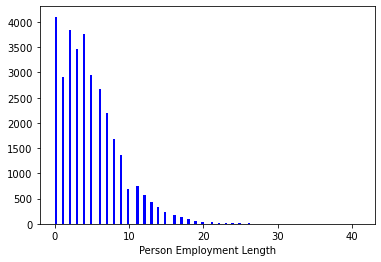

In [38]:
# Create a histogram of employment length
n, bins, patches = plt.hist(cr_loan['person_emp_length'], bins='auto', color='blue')
plt.xlabel("Person Employment Length")
plt.show()

In [39]:
cr_loan[null_columns].isnull().sum()

person_emp_length       0
loan_int_rate        3115
dtype: int64

In [40]:
# Print the number of nulls in loan_int_rate
cr_loan['loan_int_rate'].isnull().sum()

3115

In [41]:
# Store the array on indices
indices = cr_loan[cr_loan['loan_int_rate'].isnull()].index

In [42]:
indices

Int64Index([   39,    50,    57,    59,    62,    70,    71,    84,    85,
               87,
            ...
            32505, 32510, 32532, 32535, 32546, 32547, 32552, 32553, 32569,
            32570],
           dtype='int64', length=3115)

In [43]:
# Save the new data without missing data
cr_loan = cr_loan.drop(indices)
#cr_loan.drop(indices,inplace=True)

In [44]:
cr_loan.shape

(29459, 12)

In [45]:
# Count the number of records for each unique value
cr_loan['person_home_ownership'].value_counts()

RENT        14890
MORTGAGE    12119
OWN          2356
OTHER          94
Name: person_home_ownership, dtype: int64

In [46]:
#check number of levels in a column
len(cr_loan['person_home_ownership'].value_counts())

4

In [47]:
#one hot encoding, create dummy vairables for multi-categorical data

# Create two data sets for numeric and non-numeric data
cred_num = cr_loan.select_dtypes(exclude=['object'])
cred_str = cr_loan.select_dtypes(include=['object'])

# One-hot encode the non-numeric columns
cred_str_onehot = pd.get_dummies(cred_str)

# Union the one-hot encoded columns to the numeric ones
cr_loan_prep = pd.concat([cred_num, cred_str_onehot], axis=1)

In [48]:
# Print the columns in the new data set
print(cr_loan_prep.columns)

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_cred_hist_length', 'person_home_ownership_MORTGAGE',
       'person_home_ownership_OTHER', 'person_home_ownership_OWN',
       'person_home_ownership_RENT', 'loan_intent_DEBTCONSOLIDATION',
       'loan_intent_EDUCATION', 'loan_intent_HOMEIMPROVEMENT',
       'loan_intent_MEDICAL', 'loan_intent_PERSONAL', 'loan_intent_VENTURE',
       'loan_grade_A', 'loan_grade_B', 'loan_grade_C', 'loan_grade_D',
       'loan_grade_E', 'loan_grade_F', 'loan_grade_G',
       'cb_person_default_on_file_N', 'cb_person_default_on_file_Y'],
      dtype='object')


In [49]:
cr_loan_prep.dtypes
#this dataset is ready for modelling

person_age                          int64
person_income                       int64
person_emp_length                 float64
loan_amnt                           int64
loan_int_rate                     float64
loan_status                         int64
loan_percent_income               float64
cb_person_cred_hist_length          int64
person_home_ownership_MORTGAGE      uint8
person_home_ownership_OTHER         uint8
person_home_ownership_OWN           uint8
person_home_ownership_RENT          uint8
loan_intent_DEBTCONSOLIDATION       uint8
loan_intent_EDUCATION               uint8
loan_intent_HOMEIMPROVEMENT         uint8
loan_intent_MEDICAL                 uint8
loan_intent_PERSONAL                uint8
loan_intent_VENTURE                 uint8
loan_grade_A                        uint8
loan_grade_B                        uint8
loan_grade_C                        uint8
loan_grade_D                        uint8
loan_grade_E                        uint8
loan_grade_F                      

# Modelling

## Logistic Regression and Decision Tree

In [50]:
# Create X data for the model
X_multi = cr_loan_prep.drop('loan_status', axis = 1)

# Create a set of y data for training
y = cr_loan_prep[['loan_status']]

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_multi, y, test_size=.4, random_state=456)

In [52]:
X_multi.shape,X_train.shape,X_test.shape

((29459, 26), (17675, 26), (11784, 26))

In [53]:
# train a logistic regression model
from sklearn.linear_model import LogisticRegression
clf_logistic = LogisticRegression(solver='lbfgs').fit(X_train, np.ravel(y_train))

In [54]:
# train a decision tree model
import xgboost as xgb
clf_gbt = xgb.XGBClassifier().fit(X_train, np.ravel(y_train))

In [55]:
#logistic model intercept term
clf_logistic.intercept_

array([-2.41129292e-09])

In [56]:
#logistic model coefficient terms
clf_logistic.coef_

array([[-5.76413580e-08, -3.93781887e-05, -2.94528731e-08,
         1.02895291e-04,  9.53741109e-08,  2.53422784e-09,
        -8.28392580e-09, -7.28641670e-09,  8.76186674e-11,
        -4.30617650e-09,  9.09368161e-09,  2.35165740e-09,
        -3.56514633e-09,  2.08444218e-09,  1.64194468e-09,
        -1.13212942e-09, -3.79206143e-09, -1.09909907e-08,
        -6.33982416e-09, -1.50382722e-09,  1.14492677e-08,
         3.50956954e-09,  9.66744622e-10,  4.97767250e-10,
        -1.00302794e-08,  7.61898645e-09]])

In [57]:
# Create predicted probability for loan status using test data by logistic model
logistic_preds_prob = clf_logistic.predict_proba(X_test)

In [58]:
# Create predicted probability for loan status using test data by decision tree model
gbt_preds_prob = clf_gbt.predict_proba(X_test)

In [59]:
#get the probaility of default column only
logistic_df = pd.DataFrame(logistic_preds_prob[:,1], columns = ['prob_default'])

In [60]:
gbt_df = pd.DataFrame(gbt_preds_prob[:,1], columns = ['prob_default'])

In [61]:
#conda install python-graphviz

#to visualize the boosted tree

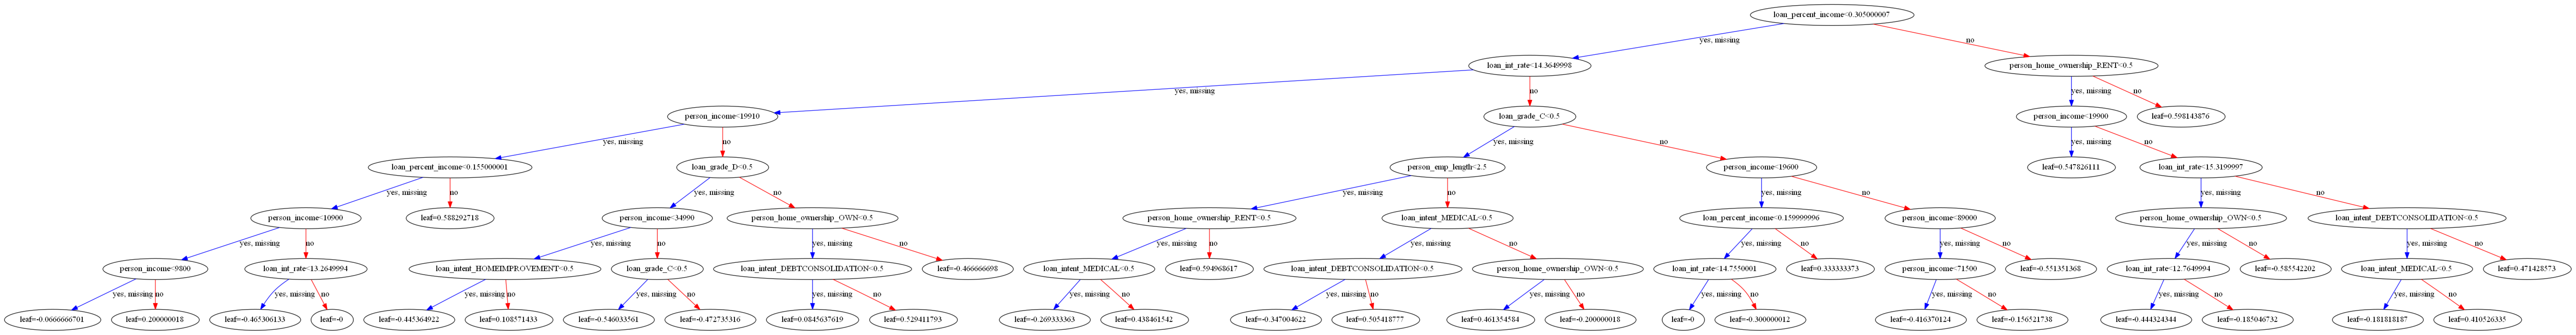

In [62]:
#plot the tree, it is hard to see here
#saved to my own environment where it can be zoomed and seen clearly 
xgb.plot_tree(clf_gbt)
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(150, 100)
fig.savefig('tree.png')

# Model Selection by estimating models key performance metrics

## 1) Total Expected Loss

In [63]:
#by using the formula: Expected loss = probaility of default * exposure at loss * loss given default
#assuming exposure at loss = loan amount (the loan applicant does not settle a debt at all)
#assuming loss given default = 1 (total loss given default)

In [64]:
#data are splitted randomly so we need to reset their index
logistic_df['loan_amnt']=X_test['loan_amnt'].reset_index()['loan_amnt']
gbt_df['loan_amnt']=X_test['loan_amnt'].reset_index()['loan_amnt']

In [65]:
logistic_df['loss_given_default']=1
gbt_df['loss_given_default']=1

In [66]:
logistic_df['expected_loss'] = logistic_df['prob_default'] * logistic_df['loan_amnt'] * logistic_df['loss_given_default']
gbt_df['expected_loss'] = gbt_df['prob_default'] * gbt_df['loan_amnt'] * gbt_df['loss_given_default']

In [67]:
logistic_tot_exp_loss = round(np.sum(logistic_df['expected_loss']),2)
gbt_tot_exp_loss = round(np.sum(gbt_df['expected_loss']),2)

In [68]:
print('Total expected loss using logistic model: ', '${:,.2f}'.format(logistic_tot_exp_loss))
print('Total expected loss using decision tree: ', '${:,.2f}'.format(gbt_tot_exp_loss))

#Some loss are unavoidable
#decision tree performs better in terms of total expected loss

Total expected loss using logistic model:  $28,100,113.90
Total expected loss using decision tree:  $26,768,883.84


## 2) ROC Curve

In [69]:
from sklearn.metrics import roc_curve
# ROC chart components
fallout_lr, sensitivity_lr, thresholds_lr = roc_curve(y_test, logistic_df['prob_default'])
fallout_gbt, sensitivity_gbt, thresholds_gbt = roc_curve(y_test, gbt_df['prob_default'])

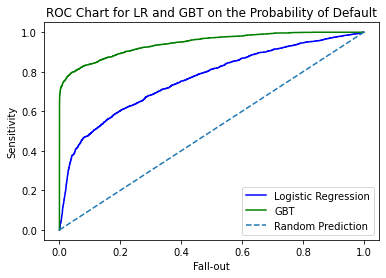

In [70]:
# ROC Chart with both
plt.plot(fallout_lr, sensitivity_lr, color = 'blue', label='%s' % 'Logistic Regression')
plt.plot(fallout_gbt, sensitivity_gbt, color = 'green', label='%s' % 'GBT')
plt.plot([0, 1], [0, 1], linestyle='--', label='%s' % 'Random Prediction')
plt.title("ROC Chart for LR and GBT on the Probability of Default")
plt.xlabel('Fall-out')
plt.ylabel('Sensitivity')
plt.legend()
plt.show()

In [71]:
from sklearn.metrics import roc_auc_score
auc_logistic = roc_auc_score(y_test, logistic_df['prob_default'])
auc_gbt = roc_auc_score(y_test, gbt_df['prob_default'])
print(auc_logistic,auc_gbt)
#both models perform better than random prediction which has a area of 0.5.
#decision tree performs better which has a higher area under curve


0.7630482356429057 0.9438284384891946


## 3) Calibration Curve

In [72]:
from sklearn.calibration import calibration_curve
fraction_of_positives_lr,mean_predicted_value_lr = calibration_curve(y_test,logistic_df['prob_default'], n_bins = 20)
fraction_of_positives_gbt,mean_predicted_value_gbt = calibration_curve(y_test,gbt_df['prob_default'], n_bins = 20)
## Fraction of positives
## Average probability

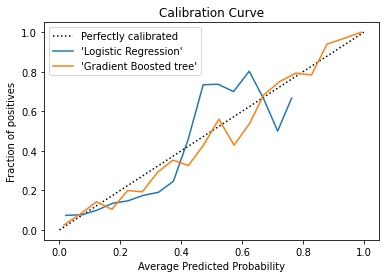

In [73]:
# Create the calibration curve plot with the guideline
plt.plot([0, 1], [0, 1], 'k:', label='Perfectly calibrated')    
plt.plot(mean_predicted_value_lr, fraction_of_positives_lr, label="%s" % "'Logistic Regression'")
plt.plot(mean_predicted_value_gbt, fraction_of_positives_gbt, label="%s" % "'Gradient Boosted tree'")
plt.ylabel('Fraction of positives')
plt.xlabel('Average Predicted Probability')
plt.legend()
plt.title('Calibration Curve')
plt.show()

In [74]:
#More interpretation of graphs:
#When the yellow line is higher than the dashed line,
#this means the number of actual defaults is larger than that of predicted defaults,
#the number os false negatives is larger. False negatives are very costly that we need to avoid,
#Since it fails to predict actual defaults and regards them as non-default.

#When the yellow line is lower than the dashed line,
#this means the number of actual defaults is smaller than that of predicted defaults,
#this results in more false positives.
#The model denied the actual non-default, which gives a loss of profit.

#For the logistic regression, 
#the calibration for probabilities starts off great but then gets more erratic starting from the average probability 0.4.
#and it cannot stabilize.
#The decision tree model eventually stabilizes, so decision tree performs better.

## 4) Classification Report and confusion matrix

In [75]:
logistic_df['pred_loan_status'] = logistic_df['prob_default'].apply(lambda x: 1 if x > 0.4 else 0)
gbt_df['pred_loan_status'] = gbt_df['prob_default'].apply(lambda x: 1 if x > 0.4 else 0)
#select a threshold to estimate model performance
#Here, the model predicts a loan application to be default if it has probability of default larger than 40%

In [76]:
#focus on default recall, which means numbers of correctly predicted default divided by numbers of actual default
#non-predcited default(false negative) are very costly

In [77]:
from sklearn.metrics import classification_report
# Print the classification report
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, logistic_df['pred_loan_status'], target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.86      0.92      0.89      9241
     Default       0.62      0.46      0.53      2543

    accuracy                           0.82     11784
   macro avg       0.74      0.69      0.71     11784
weighted avg       0.81      0.82      0.81     11784



In [78]:
print(classification_report(y_test, gbt_df['pred_loan_status'], target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.94      0.98      0.96      9241
     Default       0.91      0.76      0.83      2543

    accuracy                           0.93     11784
   macro avg       0.92      0.87      0.89     11784
weighted avg       0.93      0.93      0.93     11784



In [79]:
#another way to print the default recall
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test,gbt_df['pred_loan_status'])[1][1]

0.7620920173023987

In [80]:
#the scores from the classification report are all higher for the decision tree
#This means the tree model is better in all of these aspects.

In [81]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,logistic_df['pred_loan_status']) #tn, fp, fn, tp

array([[8524,  717],
       [1363, 1180]], dtype=int64)

In [82]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,gbt_df['pred_loan_status']) #tn, fp, fn, tp

array([[9049,  192],
       [ 605, 1938]], dtype=int64)

In [83]:
#focus on the recall for default
#recall for defaults is 0.76 meaning 76% of the actual true defaults were predicted correctly.
from sklearn.metrics import precision_recall_fscore_support
precision_recall_fscore_support(y_test,gbt_df['pred_loan_status'])[1][1]

0.7620920173023987

In [84]:
#Based on the aboved performance metrics,
#decision tree is better.
#Therefore, we adopt the tree model.

## Decision Tree

### Visualizing performance metrics

In [85]:
#plot the Default Recall, Non-default Recall, Model Accuracy of the tree model
#help to make decisions based on the diagram

thresh=[0.2,0.225,0.25,0.275,0.3,0.325,0.35,0.375,0.4,
 0.425,0.45,0.475,0.5,0.525,0.55,0.575,0.6,0.625,0.65]

In [86]:
#create a list of x-axis label
ticks=[0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65]

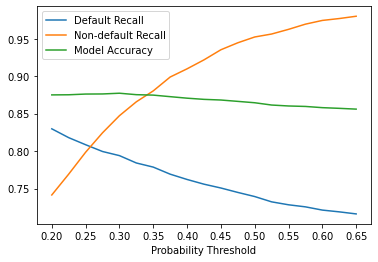

In [87]:
def_recalls=[]
nondef_recalls=[]
accs=[]
pred_num_defaults=[]

for i in thresh:
    gbt_df['pred_loan_status'] = gbt_df['prob_default'].apply(lambda x: 1 if x > i else 0)
    def_recalls.append(precision_recall_fscore_support(y_test,gbt_df['pred_loan_status'])[1][1])
    nondef_recalls.append(precision_recall_fscore_support(y_test,gbt_df['pred_loan_status'])[0][1])
    accs.append(roc_auc_score(y_test, gbt_df['pred_loan_status']))
    pred_num_defaults.append(gbt_df['pred_loan_status'].value_counts()[1]) #for calculating loss
    
plt.plot(thresh,def_recalls)
plt.plot(thresh,nondef_recalls)
plt.plot(thresh,accs) 

plt.xlabel("Probability Threshold")
plt.xticks(ticks)
plt.legend(["Default Recall","Non-default Recall","Model Accuracy"])
plt.show()

In [88]:
#greater threshold =>  smaller number for prediction defaults => more willing to lend money
#=> greater number for prediction non-defaults => more true negative and false negative
#=> consider with cost-benefit matrix
#=> greater threshold make greater income from actual non default
#=> also make greater loss from false negative
#=> generally, incur a larger loss

## Importance of features

In [89]:
#!pip3 install xgboost

In [90]:
# Create and train the model on the training data
clf_gbt= xgb.XGBClassifier().fit(X_train,np.ravel(y_train))

In [91]:
#to check which feature is important based on the frequency of use by the model
clf_gbt.get_booster().get_score(importance_type = 'weight')

{'loan_percent_income': 292,
 'loan_int_rate': 529,
 'person_income': 808,
 'loan_grade_D': 39,
 'loan_intent_HOMEIMPROVEMENT': 48,
 'loan_grade_C': 57,
 'person_home_ownership_OWN': 44,
 'loan_intent_DEBTCONSOLIDATION': 64,
 'person_emp_length': 281,
 'person_home_ownership_RENT': 54,
 'loan_intent_MEDICAL': 55,
 'person_age': 260,
 'person_home_ownership_OTHER': 2,
 'person_home_ownership_MORTGAGE': 39,
 'loan_intent_VENTURE': 28,
 'loan_amnt': 323,
 'loan_grade_E': 15,
 'cb_person_default_on_file_N': 21,
 'cb_person_cred_hist_length': 145,
 'loan_grade_G': 13,
 'loan_intent_EDUCATION': 40,
 'loan_intent_PERSONAL': 39,
 'loan_grade_F': 5,
 'loan_grade_B': 21,
 'loan_grade_A': 4}

In [92]:
#While the A-grade loans don't add much to predictions, 
#they might affect the importance of other training columns.
#because of correlations with other columns

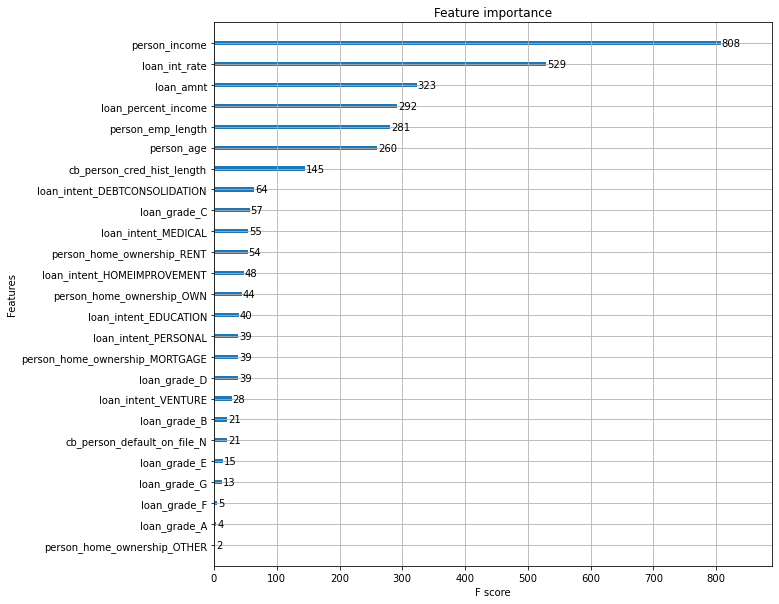

In [93]:
fig, ax = plt.subplots(figsize=(10,10))
xgb.plot_importance(clf_gbt, importance_type = 'weight',ax=ax)

## Model improvement by undersampling imbalance data

In [94]:
#Credit risk data is not balance.
#Undersampling enables balanced data, which can better train the model

# undersampling
X_y_train = pd.concat([X_train.reset_index(drop = True),y_train.reset_index(drop = True)], axis = 1)
X_y_test = pd.concat([X_test.reset_index(drop = True),y_test.reset_index(drop = True)], axis = 1)

In [95]:
count_nondefault, count_default = X_y_train['loan_status'].value_counts()

In [96]:
count_nondefault, count_default

(13755, 3920)

In [97]:
# Create data sets for defaults and non-defaults
nondefaults = X_y_train[X_y_train['loan_status'] == 0]
defaults = X_y_train[X_y_train['loan_status'] == 1]

In [98]:
# Undersample the non-defaults
nondefaults_under = nondefaults.sample(count_default)

In [99]:
# Concatenate the undersampled nondefaults with defaults
X_y_train_under = pd.concat([nondefaults_under.reset_index(drop = True),
defaults.reset_index(drop = True)], axis=0)

In [100]:
# Print the value counts for loan status
print(X_y_train_under['loan_status'].value_counts())

1    3920
0    3920
Name: loan_status, dtype: int64


In [101]:
#train a model with balanced data
gbt_undersample= xgb.XGBClassifier().fit(X_y_train_under.drop(['loan_status'],axis=1),np.ravel(X_y_train_under['loan_status']))
gbt_undersample_prob = gbt_undersample.predict_proba(X_y_test.drop(['loan_status'],axis=1))

gbt_undersample_df = pd.DataFrame(gbt_undersample_prob[:,1], columns = ['prob_default'])

In [102]:
#set a threshold and evaluate the performance of model after undersampling
gbt_df['pred_loan_status'] = gbt_df['prob_default'].apply(lambda x: 1 if x > 0.5 else 0)
gbt_undersample_df['pred_loan_status'] = gbt_undersample_df['prob_default'].apply(lambda x: 1 if x > 0.5 else 0)

In [103]:
# Check the classification reports
target_names = ['Non-Default', 'Default']
print(classification_report(y_test, gbt_df['pred_loan_status'], target_names=target_names))
print(classification_report(y_test, gbt_undersample_df['pred_loan_status'], target_names=target_names))

              precision    recall  f1-score   support

 Non-Default       0.93      0.99      0.96      9241
     Default       0.95      0.74      0.83      2543

    accuracy                           0.94     11784
   macro avg       0.94      0.86      0.90     11784
weighted avg       0.94      0.94      0.93     11784

              precision    recall  f1-score   support

 Non-Default       0.95      0.91      0.93      9241
     Default       0.71      0.83      0.76      2543

    accuracy                           0.89     11784
   macro avg       0.83      0.87      0.85     11784
weighted avg       0.90      0.89      0.89     11784



In [104]:
from sklearn.metrics import confusion_matrix
# Print the confusion matrix for the old and new models
print(confusion_matrix(y_test,gbt_df['pred_loan_status'])) #tn, fp, fn, tp
print(confusion_matrix(y_test,gbt_undersample_df['pred_loan_status']))  #tn, fp, fn, tp

[[9147   94]
 [ 663 1880]]
[[8370  871]
 [ 435 2108]]


In [105]:
# Print and compare the AUC scores of the old and new models
print(roc_auc_score(y_test, gbt_df['pred_loan_status']))
print(roc_auc_score(y_test, gbt_undersample_df['pred_loan_status']))

0.8645561252846453
0.8673441628149067


In [106]:
#Undersampling the training data results in more false positives, 
#but the recall for defaults and the AUC score are both higher than the original model. 
#The undersampled model predicts defaults much more accurately.

In [107]:
#accuracy decreased, but recall for default increased.
#we adopt the model trained with undersampled data

# Building a strategy table

## Acceptance rate, bad rate, threshold

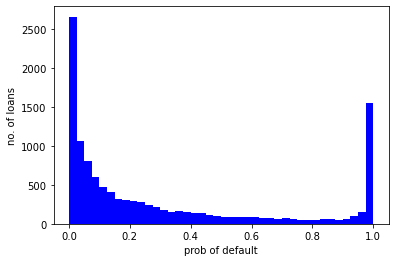

In [108]:
#acceptance rate: number of accepted loans divided by number of loan applications
#bad rate: number of default accepted loans divided by number of accepted loans

#distribution of loans with probability of default
plt.hist(gbt_undersample_df['prob_default'], color = 'blue', bins = 40)
plt.xlabel('prob of default')
plt.ylabel('no. of loans')
plt.show()

In [109]:
# Compute the threshold for 85% acceptance rate
threshold_85 = np.quantile(gbt_undersample_df['prob_default'], 0.85)

In [110]:
threshold_85
#if we choose to accept 85% of loan application,
#the upper limit of probability of default is 92.9%
#loan applicants who have the probaility of default below 92.9% would be approved for the loan

0.9318273335695267

In [111]:
gbt_undersample_df = pd.concat([y_test.reset_index(drop = True) , gbt_undersample_df], axis = 1)

In [112]:
# Apply acceptance rate threshold
gbt_undersample_df['pred_loan_status'] = gbt_undersample_df['prob_default'].apply(lambda x: 1 if x > threshold_85 else 0)

In [113]:
gbt_undersample_df['pred_loan_status'].value_counts() 
#85% of applications are predicted as non default, so to lend money out
#15% of applications are predicted as default, so to reject the applications

0    10016
1     1768
Name: pred_loan_status, dtype: int64

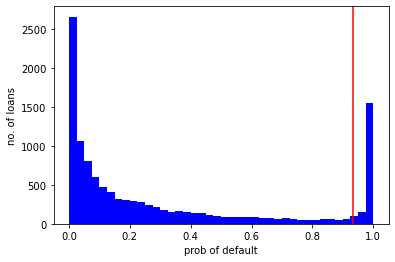

In [114]:
#visualize the plot for the threshold
plt.hist(gbt_undersample_df['prob_default'], color = 'blue', bins = 40)
plt.xlabel('prob of default')
plt.ylabel('no. of loans')

plt.axvline(x = threshold_85, color = 'red')
plt.show()

In [115]:
# Create a subset of accepted loans
accepted_loans = gbt_undersample_df[gbt_undersample_df['pred_loan_status'] == 0]

In [116]:
#there are 811 default loans in the accepted loans
np.sum(accepted_loans['loan_status'])

819

In [117]:
# Calculate the bad rate
np.sum(accepted_loans['loan_status']) / accepted_loans['pred_loan_status'].count()
#actual default/predicted non default

0.08176916932907348

In [118]:
#with threshold 85%, only about 8% accepted loans are actual default

In [119]:
#compared with threshold 100%, which has high bad rate of 22%
#threshold_100 = np.quantile(test_pred_df['prob_default'], 1)
# Apply acceptance rate threshold
#test_pred_df['pred_loan_status'] = test_pred_df['prob_default'].apply(lambda x: 1 if x > threshold_100 else 0)
# Calculate the bad rate
#accepted_loans = test_pred_df[test_pred_df['pred_loan_status'] == 0]
#np.sum(accepted_loans['loan_status']) / len(accepted_loans['loan_status'])

## Strategy Table

In [120]:
accept_rates = [1.0, 0.95, 0.9, 0.85, 0.8, 0.75, 0.7, 0.65, 0.6, 0.55, 0.5, 0.45, 0.4, 0.35, 0.3, 0.25, 0.2, 0.15, 0.1, 0.05]

In [121]:
# create empty lists and store results into them later
thresholds =[]
bad_rates =[]

In [122]:
for rate in accept_rates:
    # Calculate the threshold for the acceptance rate
    thresh = np.quantile(gbt_undersample_df['prob_default'], rate).round(3)
    # Add the threshold value to the list of thresholds
    thresholds.append(thresh)
    # Reassign the loan_status value using the threshold
    gbt_undersample_df['pred_loan_status'] = gbt_undersample_df['prob_default'].apply(lambda x: 1 if x > thresh else 0)
    # Create a set of accepted loans using this acceptance rate
    accepted_loans = gbt_undersample_df[gbt_undersample_df['pred_loan_status'] == 0]
    # Calculate and append the bad rate using the acceptance rate
    bad_rates.append(np.sum((accepted_loans['loan_status']) / len(accepted_loans['pred_loan_status'])).round(3))

In [123]:
pd.options.display.float_format = "{:,.3f}".format
strat_df = pd.DataFrame(zip(accept_rates, thresholds, bad_rates),
columns = ['Acceptance Rate','Threshold','Bad Rate'])

# Print the entire table
strat_df

,Acceptance Rate,Threshold,Bad Rate
0,1.000,1.000,0.216
1,0.950,0.999,0.181
2,0.900,0.993,0.126
3,0.850,0.932,0.082
4,0.800,0.694,0.060
5,0.750,0.512,0.050
6,0.700,0.388,0.042
7,0.650,0.299,0.035
8,0.600,0.236,0.031
9,0.550,0.186,0.027


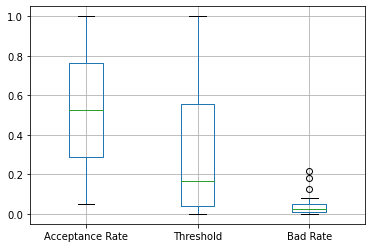

In [124]:
# Visualize the distributions in the strategy table with a boxplot
strat_df.boxplot()
plt.show()

<ipython-input-125-b53c2c41f710>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().yaxis.grid()
<ipython-input-125-b53c2c41f710>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().xaxis.grid()


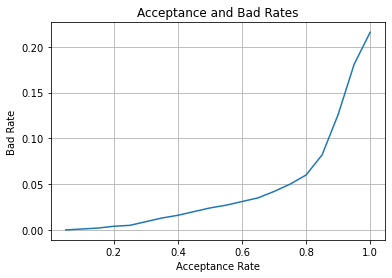

In [125]:
# Plot the strategy curve
plt.plot(strat_df['Acceptance Rate'], strat_df['Bad Rate'])
plt.xlabel('Acceptance Rate')
plt.ylabel('Bad Rate')
plt.title('Acceptance and Bad Rates')
plt.axes().yaxis.grid()
plt.axes().xaxis.grid()
plt.show()

In [126]:
#The bad rates are very low up until the acceptance rate 0.6 where they suddenly increase. 
#This suggests that many of the accepted(predicted non default) actual defaults 
#may have a prob_default value between 0.6 and 0.8.

In [127]:
# create empty lists and store results into them later
Num_Accepted_Loans=[]
Avg_Loan_Amnt=[]
Estimated_Value=[]

for rate in accept_rates:
    # Calculate the threshold for the acceptance rate
    thresh = np.quantile(gbt_undersample_df['prob_default'], rate).round(3)
    # Add the threshold value to the list of thresholds
    thresholds.append(thresh)
    # Reassign the loan_status value using the threshold
    gbt_undersample_df['pred_loan_status'] = gbt_undersample_df['prob_default'].apply(lambda x: 1 if x > thresh else 0)
    # Create a set of accepted loans using this acceptance rate
    accepted_loans = gbt_undersample_df[gbt_undersample_df['pred_loan_status'] == 0]
    # Calculate and append the bad rate using the acceptance rate
    bad_rates.append(np.sum((accepted_loans['loan_status']) / len(accepted_loans['loan_status'])).round(3))
    
    ### add three columns ###
    Num_Accepted_Loans.append(len(accepted_loans))
    Avg_Loan_Amnt.append(np.mean(X_test['loan_amnt']))
    #Estimating portfolio value
    #Average value of accepted loan non-defaults minus average value of accepted defaults
    #Assumes each default is a loss of the loan_amnt
    Estimated_Value.append((Num_Accepted_Loans[-1] * (1-bad_rates[-1]) * Avg_Loan_Amnt[-1] - 
Num_Accepted_Loans[-1] * bad_rates[-1] * Avg_Loan_Amnt[-1]))

In [128]:
pd.options.display.float_format = "{:,.3f}".format
strat_df = pd.DataFrame(zip(accept_rates, thresholds, bad_rates, Num_Accepted_Loans, Avg_Loan_Amnt, Estimated_Value),
columns = ['Acceptance Rate','Threshold','Bad Rate','Num Accepted Loans','Avg_Loan_Amnt', 'Estimated Value'])

# Print the entire table
strat_df

,Acceptance Rate,Threshold,Bad Rate,Num Accepted Loans,Avg_Loan_Amnt,Estimated Value
0,1.000,1.000,0.216,11784,"9,551.290","63,929,763.200"
1,0.950,0.999,0.181,11281,"9,551.290","68,743,288.558"
2,0.900,0.993,0.126,10575,"9,551.290","75,551,658.116"
3,0.850,0.932,0.082,10017,"9,551.290","79,984,526.367"
4,0.800,0.694,0.060,9427,"9,551.290","79,235,208.573"
5,0.750,0.512,0.050,8838,"9,551.290","75,972,870.000"
6,0.700,0.388,0.042,8251,"9,551.290","72,187,846.639"
7,0.650,0.299,0.035,7664,"9,551.290","68,077,009.678"
8,0.600,0.236,0.031,7073,"9,551.290","63,367,784.406"
9,0.550,0.186,0.027,6484,"9,551.290","58,586,313.177"


### Criterion 1: select the one with the highest estimated portfolio value

In [129]:
strat_df.loc[strat_df['Estimated Value'] == np.max(strat_df['Estimated Value'])]

,Acceptance Rate,Threshold,Bad Rate,Num Accepted Loans,Avg_Loan_Amnt,Estimated Value
3,0.850,0.932,0.082,10017,"9,551.290","79,984,526.367"


### Criterion 2: given a allowable bad rate, select the one with the highest estimated portfolio value

In [130]:
temp1 = strat_df.loc[strat_df['Bad Rate'] <0.05]
temp1.loc[temp1['Estimated Value'] == np.max(temp1['Estimated Value'])]

,Acceptance Rate,Threshold,Bad Rate,Num Accepted Loans,Avg_Loan_Amnt,Estimated Value
6,0.700,0.388,0.042,8251,"9,551.290","72,187,846.639"


### Criterion 3: given a acceptance rate, select the one with the highest estimated portfolio value

In [131]:
temp2 = strat_df.loc[strat_df['Acceptance Rate'] <0.9]
temp2.loc[temp2['Estimated Value'] == np.max(temp2['Estimated Value'])]

,Acceptance Rate,Threshold,Bad Rate,Num Accepted Loans,Avg_Loan_Amnt,Estimated Value
3,0.850,0.932,0.082,10017,"9,551.290","79,984,526.367"


<ipython-input-132-b619c224697b>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().yaxis.grid()
<ipython-input-132-b619c224697b>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.axes().xaxis.grid()


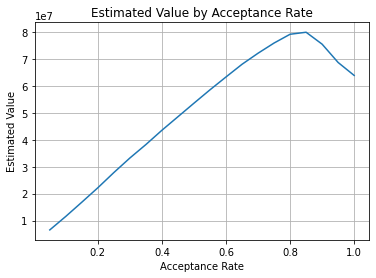

In [132]:
# visualize estimated portfolio value
plt.plot(strat_df['Acceptance Rate'],strat_df['Estimated Value'])
plt.title('Estimated Value by Acceptance Rate')
plt.xlabel('Acceptance Rate')
plt.ylabel('Estimated Value')
plt.axes().yaxis.grid()
plt.axes().xaxis.grid()
plt.show()

## Web Scraping - aastocks

In [133]:
import requests
from bs4 import BeautifulSoup

In [134]:
url = "http://www.aastocks.com/en/stocks/quote/detail-quote.aspx?"

In [135]:
sess = requests.session()
req = sess.get(url)

In [136]:
# 200 represents success
req.status_code

200

In [137]:
req.text

'\r<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd"> <html xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#"> <head id="Head1"><meta http-equiv="X-UA-Compatible" content="IE=Edge" /><meta name="google-site-verification" content="PSvX40cckR7V_q8QVaRk5jnTEIeinakRTyMqcjv9WPI" /> <script type="text/javascript">\rvar _gaq = _gaq || [];\r_gaq.push([\'_setAccount\', \'UA-20790503-3\']);\r_gaq.push([\'_setDomainName\', \'www.aastocks.com\']);\r_gaq.push([\'_setSampleRate\', \'5\']);\r_gaq.push([\'_trackPageview\']);\r_gaq.push([\'_trackPageLoadTime\']);\r_gaq.push([\'a3._setAccount\', \'UA-130882905-1\']);\r_gaq.push([\'a3._setDomainName\', \'www.aastocks.com\']);\r_gaq.push([\'a3._trackPageview\']);\r_gaq.push([\'a3._trackPageLoadTime\']);\r_gaq.push([\'vt._setAccount\', \'UA-131025525-1\']);\r_gaq.push([\'vt._setDomainName\', \'www.aastocks.com\']);\rfunction O

In [138]:
#this command cannot be ran

#with open('test.html','w') as f:
#    f.write(req.text)

In [139]:
#try this, created a test.html file in the dict, no stock price here
with open('test.html','w',encoding="utf-8") as f:
    f.write(req.text)

In [140]:
sess = requests.session()
req = sess.get(url)

headers={
   
'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.183 Safari/537.36',

"Referer": "http://www.aastocks.com/en/stocks/quote/quick-quote.aspx?symbol=00001"

}

In [141]:
req = sess.get(url,headers=headers)

In [142]:
req.text #ctrl+f search for stock price, $56.75

'\r<!DOCTYPE html PUBLIC "-//W3C//DTD XHTML 1.0 Transitional//EN" "http://www.w3.org/TR/xhtml1/DTD/xhtml1-transitional.dtd"> <html xmlns="http://www.w3.org/1999/xhtml" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#"> <head id="Head1"><meta http-equiv="X-UA-Compatible" content="IE=Edge" /><meta name="google-site-verification" content="PSvX40cckR7V_q8QVaRk5jnTEIeinakRTyMqcjv9WPI" /> <script type="text/javascript">\rvar _gaq = _gaq || [];\r_gaq.push([\'_setAccount\', \'UA-20790503-3\']);\r_gaq.push([\'_setDomainName\', \'www.aastocks.com\']);\r_gaq.push([\'_setSampleRate\', \'5\']);\r_gaq.push([\'_trackPageview\']);\r_gaq.push([\'_trackPageLoadTime\']);\r_gaq.push([\'a3._setAccount\', \'UA-130882905-1\']);\r_gaq.push([\'a3._setDomainName\', \'www.aastocks.com\']);\r_gaq.push([\'a3._trackPageview\']);\r_gaq.push([\'a3._trackPageLoadTime\']);\r_gaq.push([\'vt._setAccount\', \'UA-131025525-1\']);\r_gaq.push([\'vt._setDomainName\', \'www.aastocks.com\']);\rfunction O

In [143]:
#pass the results into beautiful soup
soup = BeautifulSoup(req.text)

In [144]:
# add . to indicate it is a class
try:
    soup.select('.content #labelLast .neg')
    soup.select('.content #labelLast .neg')[0].text
except:
    print('using pos instead of neg')
#neg or post to indicate increase or decrease in stock price

using pos instead of neg


In [145]:
soup.select('.content #labelLast .pos')[0].text

' \xa056.750'

In [146]:
soup.select('.content #labelLast .pos')[0].text.strip(' \xa0')

'56.750'

In [147]:
#function to get stock price
def getStockPrice(num):
    url = "http://www.aastocks.com/en/stocks/quote/detail-quote.aspx?symbol={}".format(num)
    sess = requests.session()

    headers={
   
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/86.0.4240.183 Safari/537.36',
    "Referer": "http://www.aastocks.com/en/stocks/quote/quick-quote.aspx?symbol=00001"
    }
    req = sess.get(url,headers=headers)
    soup = BeautifulSoup(req.text)
    return soup.select('.content #labelLast span')[0].text.strip(' \xa0')


In [148]:
#trial
getStockPrice('00001')

'56.750'

In [149]:
import datetime as dt
#assume i want to get the latest price only
#so, i used w+ to overwrite data and store it in a text file
with open('stockprice.txt', 'w+') as f:
    for StockNum in ['00001','00002','00003','00004','00005',
                     '00006','00007','00008','00009','00010']:
        f.write('The stock price of {} is {}.\n'.format(StockNum,getStockPrice(StockNum)))
    f.write('last update: {}'.format(dt.datetime.now().strftime('%Y-%d-%B,%H:%M:%S')))

In [150]:
with open('stockprice.txt',"r") as file: 
    for line in file:
        print(line)

The stock price of 00001 is 56.750.

The stock price of 00002 is 71.500.

The stock price of 00003 is 11.880.

The stock price of 00004 is 19.500.

The stock price of 00005 is 43.750.

The stock price of 00006 is 41.250.

The stock price of 00007 is 0.122.

The stock price of 00008 is 4.700.

The stock price of 00009 is 0.063.

The stock price of 00010 is 19.180.

last update: 2020-05-December,23:29:03


In [151]:
#write something and append them to the file
with open('stockprice.txt',"a") as file: 
    file.write('\n00001 is CKH HOLDINGS\n')
    file.write('00002 is CLP HOLDINGS\n')
    file.write('00003 is HK & CHINA G\n')